# **CODE CLAUSE INTERNSHIP**

**GOLDEN PROJECT-01**

**PROBLEM** : Building a Resume Parser Using NLP(Spacy) and Machine Learning




# **STATEMENT OF THE PROBLEM:**
Building a resume parser using NLP (Natural Language Processing) with spaCy and machine learning refers to creating a software application that can automatically extract relevant information from resumes. Resumes often contain structured and unstructured information about an individual's educational background, work experience, skills, and contact details. The goal of a resume parser is to process these resumes and extract specific pieces of information in a structured format.

# **DONE BY**
**NAME:** MONICA R

**GMAIL ID:** monicaram365@gmail.com

# **Importing the libraries**

In [4]:
import pandas
import spacy
import nltk
import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
import re

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
text_nonpunc=''.join([char for char in skills if char not in string.punctuation])
skills=text_nonpunc
tokens=re.split('\W+',skills)
skills=tokens
stop_words=set(stopwords.words('english'))
re_sw=[word for word in skills if word not in stop_words]
skills=re_sw
ln=nltk.WordNetLemmatizer()
lemm=[ln.lemmatize(word) for word in skills]
skills=lemm

In [8]:
nlp = spacy.load("en_core_web_sm")
doc=nlp(' '.join([char for char in skills]))
def tot_list(text):
  return set(' '.join([char for char in text]).lower().split(' '))
skills_list=set(' '.join([chunk.text for chunk in doc.noun_chunks]+[token.lemma_ for token in doc if token.pos_ == "VERB"]+[entity.text for entity in doc.ents]).lower().split(' '))


In [9]:
skills_list

{'add',
 'advantage',
 'algebra',
 'amount',
 'analysis',
 'analyst',
 'analytic',
 'analytical',
 'analyze',
 'apply',
 'aspect',
 'audience',
 'background',
 'bayes',
 'become',
 'business',
 'c',
 'calculus',
 'career',
 'carrying',
 'certificate',
 'challenge',
 'classifier',
 'cleanse',
 'collaborate',
 'collection',
 'communication',
 'company',
 'computer',
 'create',
 'data',
 'database',
 'datadriven',
 'decision',
 'degree',
 'describe',
 'description',
 'desirable',
 'develop',
 'dream',
 'encode',
 'engineering',
 'enhance',
 'enhancing',
 'essential',
 'estimator',
 'etc',
 'excellent',
 'experience',
 'expert',
 'extract',
 'familiarity',
 'feature',
 'field',
 'find',
 'forests',
 'fundamental',
 'get',
 'ggplot',
 'good',
 'great',
 'handling',
 'handson',
 'help',
 'hive',
 'imperfection',
 'important',
 'include',
 'incredibly',
 'industry',
 'information',
 'integrity',
 'it',
 'java',
 'job',
 'key',
 'knearest',
 'knowledge',
 'language',
 'large',
 'learn',
 'lear

In [10]:
df=pandas.read_csv('/content/resumedataset.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


# **Description about columns**
**Category** = It describes about the role/field of the job which the applicants are insterested in

**Resume** = It consists of the skills mentioned by the candidates

In [12]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [13]:

len(df['Category'].value_counts())


25

# **BAR PLOT TO VISUALIZE THE RESUME DATA**

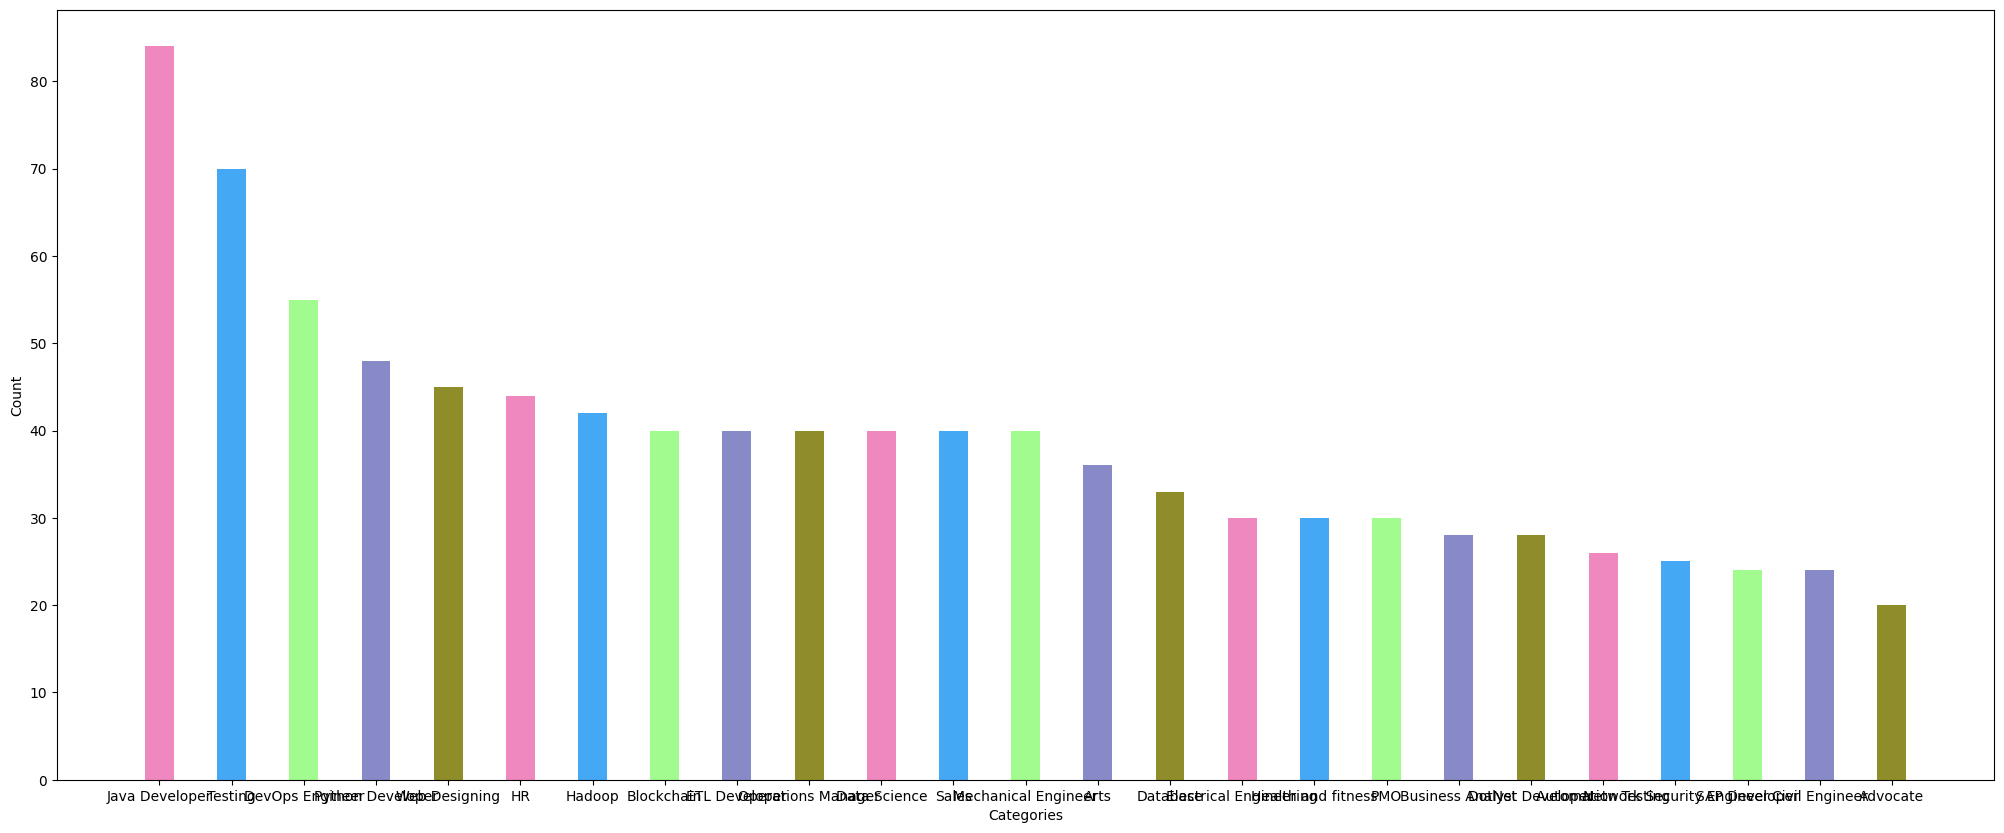

In [18]:
fig = plt.figure(figsize=(25, 10))

# Use a professional color palette
bar_colors = ['#EF88BE', '#45A8F5', '#A1FB8E', '#878AC7', '#8F8D2A']

plt.bar(df['Category'].value_counts().keys(), df['Category'].value_counts().values, width=0.4, color=bar_colors)

plt.xlabel('Categories')
plt.ylabel('Count')

# Display the plot
plt.show()

# **Combining the "Category" and "Resume" columns to identify shared words and phrases.**

In [19]:
df['info']=df['Category']+' '+df['Resume']

# **To eliminate punctuation from a newly created information column.**

In [20]:
def remove_punc(text):
  text_nonpunc=''.join([char for char in text if char not in string.punctuation])
  return text_nonpunc
df['clean_punc']=df['info'].apply(lambda x:remove_punc(x))
df.to_csv('after_remove_punc',index=False)


# **TOKENIZATION**

In [21]:
def token(text):
  tokens=re.split('\W+',text)
  return tokens
df['after_tokenization']=df['info'].apply(lambda x:token(x))
df.to_csv('after_tokenization.csv',index=False)


# **POS TAGGING**

In [23]:
from nltk import pos_tag
def pos_tag(text):
  pos_text=nltk.pos_tag(text)
  return pos_text
df['after_pos_tagging']=df['after_tokenization'].apply(lambda x:pos_tag(x))
df.to_csv('after_pos_tagging.csv',index=False)


# **REMOVING STOPWORDS**

In [24]:
stop_words=set(stopwords.words('english'))
def remove_stopword(text):
  re_sw=[word for word in text if word not in stop_words]
  return re_sw
df['remove_sw']=df['after_tokenization'].apply(lambda x:remove_stopword(x))
df.to_csv('after_re_sw.csv',index=False)


# **LEMMATIZATION**

In [25]:
ln=nltk.WordNetLemmatizer()
def lemm(text):
  z=[ln.lemmatize(word) for word in text]
  return z
df['after_lemmatization']=df['remove_sw'].apply(lambda x:lemm(x))
df.to_csv('after_lemmatization.csv',index=False)

In [26]:
nlp = spacy.load("en_core_web_sm")

# **Showing noun phrases present in each column.**

In [27]:
def noun_phrases(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [chunk.text for chunk in doc.noun_chunks]
df['noun_phrases']=df['after_lemmatization'].apply(lambda x:noun_phrases(x))
df['noun_phrases']


0      [Data Science Skills Programming Languages Pyt...
1      [Data Science Education Details May 2013 May 2...
2      [Data Science Areas Interest Deep Learning Con...
3      [Data Science Skills â R â Python, SAP, HANA, ...
4      [Data Science Education Details MCA YMCAUST Fa...
                             ...                        
957    [Computer Skills â Proficient MS office, Word ...
958    [Testing â Willingness, challenge, Positive th...
959    [Testing PERSONAL SKILLS â Quick learner â Eag...
960    [Testing COMPUTER SKILLS SOFTWARE, KNOWLEDGE M...
961    [Testing Skill Set OS Windows XP, 2012 Languag...
Name: noun_phrases, Length: 962, dtype: object

# **REPRESENTING VERB FORMS IN EACH COLUMN**

In [28]:
def verb_forms(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [token.lemma_ for token in doc if token.pos_ == "VERB"]
df['verb_forms']=df['after_lemmatization'].apply(lambda x:verb_forms(x))
df['verb_forms']

0      [learn, learn, boost, embed, model, understand...
1      [learn, sagar, deploy, learn, miss, encode, sc...
2      [ltspice, ENTHUSIAST, excel, mathematic, work,...
3      [learn, involve, analyse, come, give, carry, p...
4                                                     []
                             ...                        
957    [test, work, motivate, check, follow, conduct,...
958    [accept, declare, mention, bear, mention, perf...
959    [learn, conduct, prepare, inverter, set, cause...
960                             [wind, use, use, design]
961    [test, report, handle, test, execute, coordina...
Name: verb_forms, Length: 962, dtype: object

In [29]:
def named_entities(text):
  x=' '.join([y for y in text])
  doc=nlp(x)
  return [entity.text for entity in doc.ents]
df['named_entities']=df['after_lemmatization'].apply(lambda x:named_entities(x))
df['named_entities']

0      [Sql Java JavaScript JQuery Machine, Cassandra...
1      [Data Science Education, May 2013, May 2017, M...
2      [Data Science Areas Interest Deep Learning Con...
3      [Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...
4      [Data Science Education Details, Haryana Data ...
                             ...                        
957    [Word Basic Excel Power point, Bachelor Electr...
958    [Team Player, June 2015, June 2012, Abacus Ele...
959    [Eagerness, Competitive, January 2012, January...
960    [MS Power Point MS Office C Protius PCB Design...
961    [Skill Set OS, 2005 2008 2012, January 2016, J...
Name: named_entities, Length: 962, dtype: object

# **Combining noun phrases, verb forms, and named entities into a unified column to identify matching words and phrases.**








In [30]:
def string(text):
  return set(' '.join([char for char in text]).lower().split(' '))
df['total_words']=(df['noun_phrases']+df['verb_forms']+df['named_entities']).apply(lambda x:string(x))
df['total_words']

0      {expression, issue, projects, manager, nltk, g...
1      {reasearch, python, sukh, model, aditya, block...
2      {i, windows, python, base, public, mirage, pro...
3      {i, sciences, database, capability, top, agent...
4      {skill, details, structure, science, python, e...
                             ...                        
957    {test, co, follow, testing, transformer, solut...
958    {i, issue, manager, player, jaywant, test, fol...
959    {coil, snd, mog, successfully, cubicle, test, ...
960    {i, skill, details, keil, rb, mini, matlab, ma...
961    {cases, windows, manager, projects, base, test...
Name: total_words, Length: 962, dtype: object

In [31]:

df['total_words'][0]

{'24',
 '4',
 '6',
 'accelerate',
 'accelerating',
 'accounting',
 'action',
 'address',
 'analysis',
 'analytic',
 'analytics',
 'analyze',
 'and',
 'anomaly',
 'answer',
 'ask',
 'assist',
 'assisted',
 'associate',
 'assurance',
 'automate',
 'automated',
 'base',
 'based',
 'bayes',
 'blob',
 'boost',
 'bootstrap',
 'bot',
 'build',
 'case',
 'cassandra',
 'category',
 'chain',
 'chat',
 'chatbot',
 'classification',
 'classifier',
 'client',
 'clients',
 'cloud',
 'code',
 'coding',
 'comment',
 'company',
 'content',
 'core',
 'cosine',
 'cost',
 'counter',
 'create',
 'created',
 'css',
 'customer',
 'customize',
 'customized',
 'cv',
 'd3',
 'dashboard',
 'data',
 'database',
 'dc',
 'decision',
 'deep',
 'description',
 'details',
 'develop',
 'developed',
 'development',
 'different',
 'dimensionality',
 'discovery',
 'dispute',
 'doc2vec',
 'docker',
 'domain',
 'e',
 'education',
 'effective',
 'elastic',
 'elasticsearch',
 'embed',
 'end',
 'ensure',
 'entire',
 'ernst',
 

# **Generating a column indicating the number of matching skills in each resume.**








In [32]:
def ct(text):
  count=0
  for i in text:
    if i in skills_list:
      count+=1
  return count

df['skills_matched']=df['total_words'].apply(lambda x:ct(x))
df

,Category,Resume,info,clean_punc,after_tokenization,after_pos_tagging,remove_sw,after_lemmatization,noun_phrases,verb_forms,named_entities,total_words,skills_matched
0,Data Science,Skills * Programming Languages: Python (pandas...,Data Science Skills * Programming Languages: P...,Data Science Skills Programming Languages Pyt...,"[Data, Science, Skills, Programming, Languages...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, Programming, Languages...","[Data, Science, Skills, Programming, Languages...",[Data Science Skills Programming Languages Pyt...,"[learn, learn, boost, embed, model, understand...","[Sql Java JavaScript JQuery Machine, Cassandra...","{expression, issue, projects, manager, nltk, g...",48
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science Education Details \r\nMay 2013 to...,Data Science Education Details \r\nMay 2013 to...,"[Data, Science, Education, Details, May, 2013,...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, May, 2013,...","[Data, Science, Education, Details, May, 2013,...",[Data Science Education Details May 2013 May 2...,"[learn, sagar, deploy, learn, miss, encode, sc...","[Data Science Education, May 2013, May 2017, M...","{reasearch, python, sukh, model, aditya, block...",13
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Data Science Areas of Interest Deep Learning, ...",Data Science Areas of Interest Deep Learning C...,"[Data, Science, Areas, of, Interest, Deep, Lea...","[(Data, NNP), (Science, NNP), (Areas, NNP), (o...","[Data, Science, Areas, Interest, Deep, Learnin...","[Data, Science, Areas, Interest, Deep, Learnin...",[Data Science Areas Interest Deep Learning Con...,"[ltspice, ENTHUSIAST, excel, mathematic, work,...",[Data Science Areas Interest Deep Learning Con...,"{i, windows, python, base, public, mirage, pro...",20
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,Data Science Skills â¢ R â¢ Python â¢ SAP H...,"[Data, Science, Skills, â, R, â, Python, â, SA...","[(Data, NNP), (Science, NNP), (Skills, NNP), (...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data, Science, Skills, â, R, â, Python, â, SA...","[Data Science Skills â R â Python, SAP, HANA, ...","[learn, involve, analyse, come, give, carry, p...","[Tableau, SAP HANA, SAP HANA PAL, SAP Lumira, ...","{i, sciences, database, capability, top, agent...",48
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science Education Details \r\n MCA YMCA...,Data Science Education Details \r\n MCA YMCA...,"[Data, Science, Education, Details, MCA, YMCAU...","[(Data, NNP), (Science, NNP), (Education, NNP)...","[Data, Science, Education, Details, MCA, YMCAU...","[Data, Science, Education, Details, MCA, YMCAU...",[Data Science Education Details MCA YMCAUST Fa...,[],"[Data Science Education Details, Haryana Data ...","{skill, details, structure, science, python, e...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Testing Computer Skills: â¢ Proficient in MS ...,Testing Computer Skills â¢ Proficient in MS o...,"[Testing, Computer, Skills, â, Proficient, in,...","[(Testing, VBG), (Computer, NNP), (Skills, NNP...","[Testing, Computer, Skills, â, Proficient, MS,...","[Testing, Computer, Skills, â, Proficient, MS,...","[Computer Skills â Proficient MS office, Word ...","[test, work, motivate, check, follow, conduct,...","[Word Basic Excel Power point, Bachelor Electr...","{test, co, follow, testing, transformer, solut...",12
958,Testing,â Willingness to accept the challenges. â ...,Testing â Willingness to accept the challeng...,Testing â Willingness to accept the challeng...,"[Testing, â, Willingness, to, accept, the, cha...","[(Testing, VBG), (â, JJ), (Willingness, NNP), ...","[Testing, â, Willingness, accept, challenges, ...","[Testing, â, Willin

# **Resumes with skills that have a match count exceeding 40.**

In [33]:
df[df['skills_matched']>=40][['Category','Resume','skills_matched']]

,Category,Resume,skills_matched
0,Data Science,Skills * Programming Languages: Python (pandas...,48
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
10,Data Science,Skills * Programming Languages: Python (pandas...,48
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
17,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
20,Data Science,Skills * Programming Languages: Python (pandas...,48
23,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,48
27,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,49
30,Data Science,Skills * Programming Languages: Python (pandas...,48


In [35]:
len(df[df['skills_matched']>=40][['Category','Resume','skills_matched']])


44

In [36]:
df['skills_matched'].value_counts()

14    80
6     52
11    52
13    50
9     49
5     47
4     41
16    37
21    36
12    32
19    31
29    31
22    30
15    30
25    29
26    28
20    28
10    24
17    22
38    20
18    20
30    18
45    16
28    16
23    16
8     14
31    13
32    10
37    10
40    10
24     9
48     8
35     8
46     6
7      6
3      6
36     6
33     6
34     5
27     4
49     4
1      2
Name: skills_matched, dtype: int64

Text(0.5, 1.0, 'Skill matching values count in different ranges')

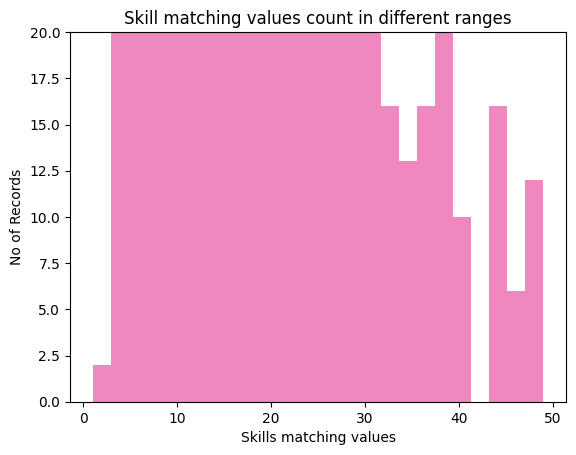

In [40]:
plt.hist(df['skills_matched'],bins=25,color='#EF88BE')
plt.ylim(0,20)
plt.xlabel('Skills matching values')
plt.ylabel('No of Records')
plt.title('Skill matching values count in different ranges')

# **Observations from the chart:**
1.Indicate that a majority of resumes have insufficient matches with the specified skill sets, and those with matching skill sets are predominantly below 40.


2.Specifically, only 44 resumes exhibit matches exceeding 40.